In [1]:
from ROOT import *

Welcome to JupyROOT 6.26/00


In [2]:
file = TFile.Open("test.root", "READ")
tree = file.Get("Position")

In [3]:
hist = TH1F("number of photons per run", "", 20000, 0, 20000)
FZ = []
FY = []

In [4]:
for entry in tree:
    hist.Fill(entry.fEvent)
    FZ.append(entry.fZ)
    FY.append(entry.fY)

In [5]:
S = 0
ZY = []
for i in range(20000):
    N = []
    for j in range(S, S + int(hist.GetBinContent(i+1))):
        N.append((FZ[j],FY[j]))
        S = S + 1
    ZY.append(N)

In [6]:
ZY_new = []
for i in range(20000):
    ZY_new.append(list(set(ZY[i])))

In [27]:
AA = []
for j in range(40):
    s = 0
    for i in range(500*j, 500*j+500):
        s = s + len(ZY_new[i])/len(ZY[i])
    AA.append([(j+1)/10, s/500])

In [29]:
AA[0]

[0.1, 0.2107872264018734]

In [32]:
EE = []
for j in range(40):
    e = 0
    for i in range(500*j, 500*j + 500):
        e = e + (AA[j][1]-len(ZY_new[i])/len(ZY[i]))**2
    EE.append(sqrt(e/500))

In [34]:
for i in range(40):
    print(AA[i][0], AA[i][1], EE[i])

0.1 0.2107872264018734 0.027271005357625416
0.2 0.2876473863392949 0.04095287023779671
0.3 0.33295757686930444 0.04689465379565081
0.4 0.3725301398291953 0.05180509085011889
0.5 0.3947496036573967 0.061076933581498315
0.6 0.41125072902358095 0.06377618625777934
0.7 0.42838634498761535 0.0692770965930484
0.8 0.4337209475145111 0.07480987461537456
0.9 0.4439015203328559 0.07206704554420044
1.0 0.4431782535748941 0.08121073826325846
1.1 0.4483527589709561 0.07992159423262989
1.2 0.4624685945250741 0.07983657932969233
1.3 0.4546425976443255 0.08235136346493437
1.4 0.4583357656405596 0.08416533596161566
1.5 0.46814030029894027 0.08363984779991278
1.6 0.45094339297590746 0.09953420371552076
1.7 0.27783180092246074 0.04098907979169967
1.8 0.2927223689338103 0.05244954192626397
1.9 0.34422579169066336 0.05592680059895312
2.0 0.38515108154526206 0.06602094211048823
2.1 0.41423985051507833 0.07245305854822862
2.2 0.42920196167543717 0.08443482896510372
2.3 0.4512818081008771 0.08259112898731738


In [39]:
rr = TCanvas()
rh = TGraphErrors()
for i in range(40):
    rh.SetPoint(i, AA[i][0], AA[i][1])
    rh.SetPointError(i, 0, EE[i])
rh.SetMarkerStyle(20)
rh.GetYaxis().SetRangeUser(0, 0.65)
rh.Draw("AP")

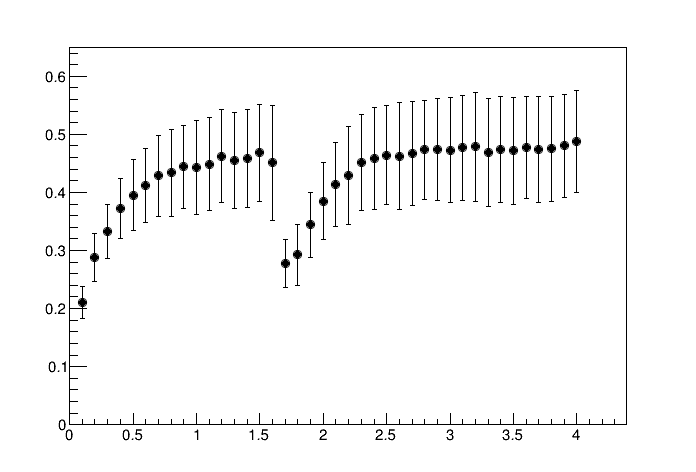

In [40]:
rr.Draw()

In [51]:
h2p = TH2Poly("h2p", "", 0.9, 1.0, -0.04, 0.16)

In [52]:
dx=57.5/10000 
dy=62.5/10000
for i in range(26):
    for j in range(225):
        h2p.AddBin(dx*j, i*dy-3*dy, (j+1)*dx, (i+1)*dy-3*dy)

In [53]:
for j in range(len(ZY[8651])):
    h2p.Fill(ZY[8651][j][0],ZY[8651][j][1])

In [54]:
c2 = TCanvas()
gStyle.SetOptStat(1)

In [55]:
h2p.Draw("TEXT")

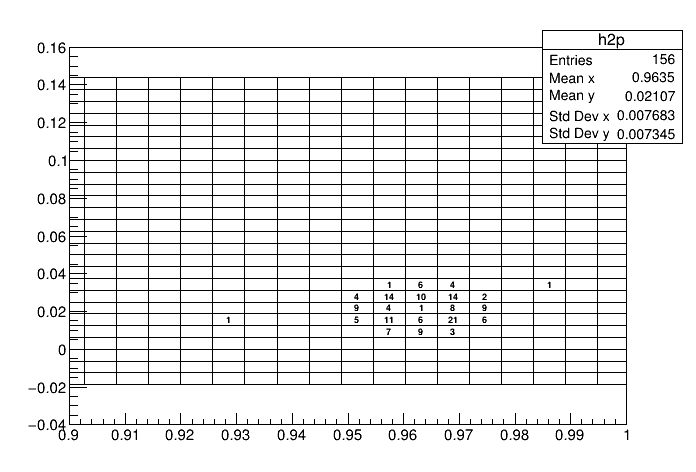

In [56]:
c2.Draw()

In [49]:
h1p = TH2Poly("h1p", "", 0.9, 1.0, -0.04, 0.16)

In [50]:
dx=57.5/10000 
dy=62.5/10000
for i in range(26):
    for j in range(225):
        h1p.AddBin(dx*j, i*dy-3*dy, (j+1)*dx, (i+1)*dy-3*dy)

In [57]:
for j in range(len(ZY_new[8651])):
    h1p.Fill(ZY_new[8651][j][0],ZY_new[8651][j][1])

In [58]:
c3 = TCanvas()
h1p.GetYaxis().SetLabelSize(0)

In [59]:
h1p.Draw("TEXT")

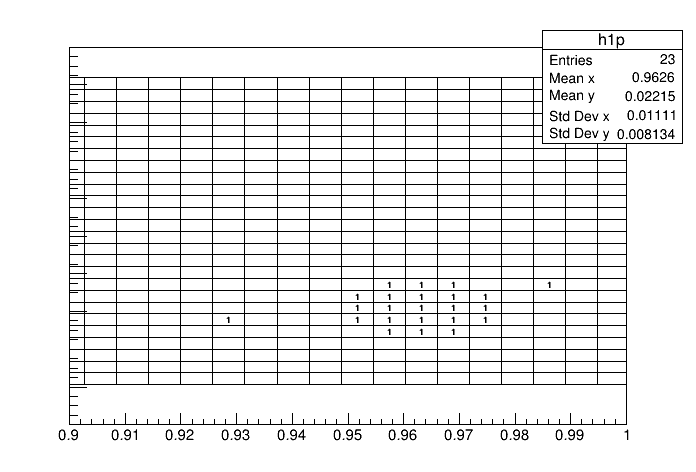

In [60]:
c3.Draw()

In [7]:
ZY_NEW = []
for i in range(20000):
    M = []
    for j in range(len(ZY_new[i])):
        if ZY_new[i][j][0] >= 0.9085 and ZY_new[i][j][0] <= 1.0005:
            M.append(ZY_new[i][j])
    ZY_NEW.append(M)

In [17]:
histEN = []
fit = []
for i in range(0, 20000):
    if ((i+1)/500).is_integer():
        h = TH1F(str((i+1)/5000) + " GeV", "", 50, 9400, 9800)
        f = TF1("fit"+str((i+1)/5000), "gaus", 9400, 9800)
        histEN.append(h)
        fit.append(f)

In [18]:
for k in range(len(histEN)):
    S = 0
    for i in range(k*500, k*500 + 500):
        Z = 0.
        if len(ZY_NEW[i]) != 0:
            for j in range(len(ZY_NEW[i])):
                Z = Z + (4*(floor(ZY_NEW[i][j][0]/0.023)+1)-2)*0.00575*10000
                S = S + 1
            histEN[k].Fill(Z/len(ZY_NEW[i]))

In [19]:
c = TCanvas()

In [20]:
histEN[1].Draw()

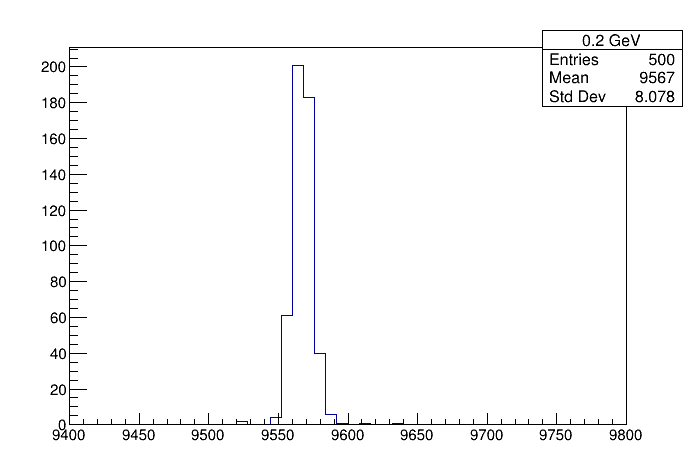

In [21]:
c.Draw()

In [22]:
points = []
errors = []
for k in range(len(histEN)):
    histEN[k].Fit("fit"+str((k+1)/10))
    points.append(float(fit[k].GetParameter(2)))
    errors.append(float(fit[k].GetParError(2)))

 FCN=5.04527 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=3.40047e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.59344e+02   1.48607e+01   1.39941e-02  -8.68956e-06
   2  Mean         9.56773e+03   2.79532e-01   4.56225e-03   7.04428e-06
   3  Sigma        6.09130e+00   2.16498e-01   1.00160e-05   1.49030e-02
 FCN=7.10936 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=1.21695e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.26288e+02   1.27797e+01   1.41737e-02   1.00164e-05
   2  Mean         9.56735e+03   3.15070e-01   4.56207e-03  -3.04557e-04
   3  Sigma        6.95308e+00   

In [23]:
for j in range(len(points)):
    print((j+1)/10, points[j], errors[j])

0.1 6.091302506622635 0.21649837565687058
0.2 6.953083713339301 0.23748098317987631
0.3 6.658179323230066 0.2570782111086918
0.4 8.033380923814882 0.3294774288027673
0.5 7.8773221289780375 0.31286156065902393
0.6 8.476873249719448 0.32091595537427775
0.7 8.77741660813417 0.28852737441631593
0.8 9.111035723673725 0.3475896855590701
0.9 9.70472525061969 0.4294423545737791
1.0 9.415706321439705 0.3241088457329777
1.1 9.574537141990426 0.3553391822675378
1.2 9.991961420052217 0.33635982474785475
1.3 10.33310410890335 0.37556848476283644
1.4 10.209529863413284 0.40227163123376375
1.5 10.400489633774221 0.4665642052665815
1.6 10.521080460786926 0.3931484505015588
1.7 13.78618216470658 0.4230096237612928
1.8 15.116040137292085 0.5239183194518873
1.9 14.228896114004533 0.4412893946387024
2.0 12.860515777381298 0.47151796120114664
2.1 12.108507989910743 0.4263305330316962
2.2 12.332433312946895 0.5094174070965964
2.3 11.68621151446934 0.40412812318637137
2.4 11.300683350633287 0.423251642516161

In [34]:
gr = TGraphErrors()

In [76]:
for i in range(len(points)):
    if i == 16:
        gr.SetPoint(i, (i+1)/10, 26.84)
        gr.SetPointError(i, 0, 1.16)
    elif i == 17:
        gr.SetPoint(i, (i+1)/10, 27.84)
        gr.SetPointError(i, 0, 1.16)
    elif i == 18:
        gr.SetPoint(i, (i+1)/10, 29.84)
        gr.SetPointError(i, 0, 1.16)
    else:
        gr.SetPoint(i, (i+1)/10, points[i]*2.355)
        gr.SetPointError(i, 0, errors[i]*2.355)

In [77]:
c1 = TCanvas()
gr.GetYaxis().SetRangeUser(0, 40)

In [78]:
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)
gr.Draw("AP")

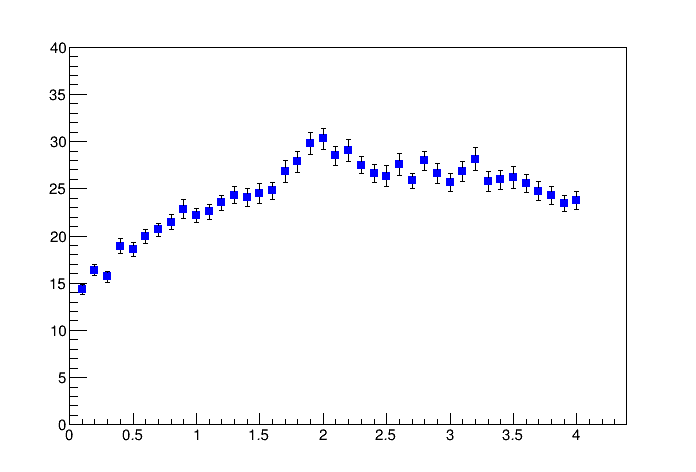

In [79]:
c1.Draw()

In [80]:
c1.Print("resolE.pdf")

Info in <TCanvas::Print>: pdf file resolE.pdf has been created


In [361]:
c1 = TCanvas()

In [362]:
histEN[17].Draw()

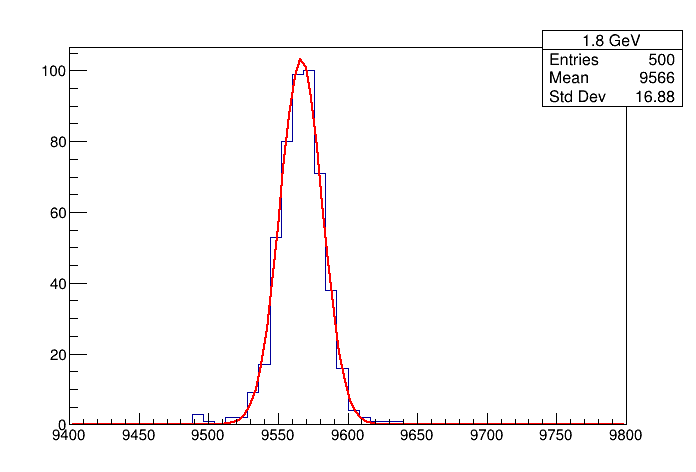

In [363]:
c1.Draw()